In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df = pd.read_pickle('data/pitt_complete_full_interview_dataframe.pickle')

In [3]:
df_single = pd.read_pickle('data/pitt_complete_dataframe_single_utterances.pickle')

In [4]:
df.head()

,label,text
0,Control,"[okay, there, s, a, cookie, jar, on, the, shel..."
1,Control,"[the, kids, are, in, the, cookies, the, stool,..."
2,Control,"[well, Johnny, s, fallin, g, off, the, stool, ..."
3,Control,"[alright, the, boy, is, taking, a, cookie, out..."
4,Control,"[mhm, well, the, water, s, running, over, on, ..."


In [5]:
print('There are {} patients in the dataset'.format(max(df_single.id)))

There are 1291 patients in the dataset


In [6]:
df['label'].value_counts()

Dementia    1049
Control      243
Name: label, dtype: int64

In [1]:
for row in df.itertuples():
    print(len(row.text))


NameError: name 'df' is not defined

In [ ]:
print('There are {}% Control patients and {}% Dementia patients'.format(243*100/(309+243),309*100/(309+243)))

There are 44.02173913043478% Control patients and 55.97826086956522% Dementia patients


In [16]:
df['length'] = df['text'].str.len()
print(df.describe())
print(np.median(df['length']))
df_single['length'] = df_single['text'].str.len()

            length
count  1292.000000
mean     84.382353
std      58.022733
min       0.000000
25%      45.000000
50%      73.000000
75%     109.000000
max     530.000000
73.0


{'whiskers': [<matplotlib.lines.Line2D at 0x10edaccc0>,
 'caps': [<matplotlib.lines.Line2D at 0x10edac6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x10edaceb8>],
 'medians': [<matplotlib.lines.Line2D at 0x10edac0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x10ed93e48>],
 'means': []}

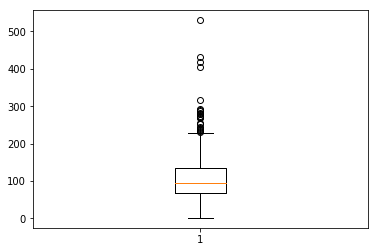

In [37]:
plt.boxplot(df['length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10ed5dda0>,
 'caps': [<matplotlib.lines.Line2D at 0x10ed4b4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x10ed5dc50>],
 'medians': [<matplotlib.lines.Line2D at 0x10ed4bb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x10ed4be80>],
 'means': []}

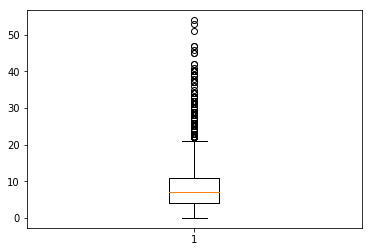

In [38]:
plt.boxplot(df_single['length'])

In [ ]:
### plot all percentiles can be good 

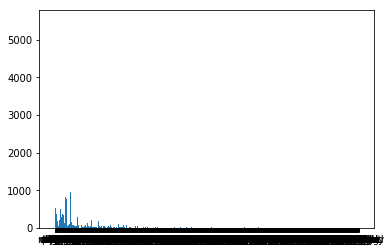

number of different words: 1907
okay 176
there 636
s 3322
a 1495
cookie 821
jar 524
on 858
the 5506
shelf 12
and 2472
little 474
boy 543
up 354
stool 633
is 1804
about 194
to 901
uh 1367
fall 190
he 718
turn 21
over 558
girl 444
in 672
picture 43
reaching 203
for 327
mother 476
washing 151
dishes 566
water 668
running 200
onto 89
floor 291
she 982
has 308
plate 107
her 508
hand 234
towel 19
drying 236
two 140
cups 98
are 280
sitting 13
counter 62
also 45
you 285
can 149
see 360
out 288
through 23
kitchen 96
window 303
another 55
part 26
of 338
house 63
dri 1
walk 19
way 34
away 6
from 135
across 3
other 55
roof 3
with 181
tree 34
that 811
curtains 125
windows 16
did 55
I 857
cover 4
it 763
all 233
exc 430
yeah 83
kids 48
cookies 356
falling 168
spilling 50
wind 25
might 30
be 260
blowing 44
t 455
tell 63
anything 54
going 170
outside 112
or 235
not 115
guess 111
very 37
many 14
well 254
Johnny 8
fallin 63
g 963
off 261
after 12
tryin 54
steal 7
outof 181
gon 154
na 160
give 34
th 54
em

often 1
lousy 1
washer 2
ma 1
affected 1
reference 1
carpentry 1
affair 1
eventually 1
darn 1
shall 2
crawled 1
tiltin 2
lis 1
slippin 1
wowie 1
wondering 1
ov 1
wee 2
puffy 1
venture 1
draining 1
angry 2
ends 1
bumpin 1
calm 1
cappdf 1
five 1
shouldn 1
bother 1
wat 1
op 1
flu 1
noises 1
eaten 1
eems 1
howabout 1
dug 1
letters 1
whatcha 1
adjacent 1
anywhere 1
wahoo 1
ho 2
calamity 1
keeps 1
sorto 1
bitchy 1
floodin 1
plat 1
gosh 1
kæl 1
lay 1
ust 1
forget 1
spilt 3
picked 1
broken 1
silencing 2
kɪtʃə 1
pleasures 1
checked 1
new 1
game 1
play 1
christmas 1
bʌmbʌdɪ 2
sings 2
beat 2
rows 1
machine 1
ca 1
keeping 1
dishwashin 1
mumbles 1
bunch 2
hiss 1
possible 1
line 1
pattern 1
changing 1
clock 2
bent 1
knee 1
ails 1
planted 1
solidly 1
fountain 2
found 1
leak 1
every 1
mantle 1
squirting 1
cross 1
trap 1
gɪɾəl 1
bɪɾəl 1
highchair 1
plain 1
awfully 1
distinguish 1
leaking 1
jack 1
cushion 1
hat 1
ave 2
salient 1
wipes 1
dries 1
forth 1
missing 1
having 1
plant 1
shiny 1
dɛdɪk 1
lengths 

In [52]:
from collections import Counter
def plot_word_distribution(df,print_frequent = True):
    all_the_words = []
    for interview in df['text']:
        all_the_words = all_the_words + interview
    counter = Counter(all_the_words)
    labels, values = zip(*counter.items())

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()
    
    print('number of different words: {}'.format(len(counter)))
    
    if print_frequent == True: 
        for key,value in counter.items():
            print(key,value)
    
    
plot_word_distribution(df)

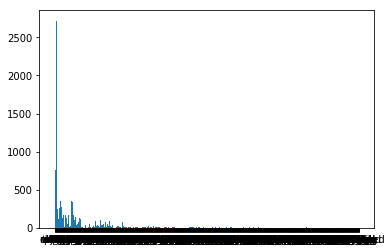

number of different words: 1234
okay 111
there 295
s 1425
a 762
cookie 421
jar 229
on 408
the 2719
shelf 8
and 1075
little 208
boy 253
up 143
stool 316
is 1030
about 116
to 456
uh 559
fall 84
he 263
turn 6
over 250
girl 221
in 351
picture 15
reaching 137
for 169
mother 277
washing 78
dishes 258
water 314
running 129
onto 50
floor 128
she 399
has 168
plate 62
her 271
hand 144
towel 13
drying 157
two 73
cups 53
are 167
sitting 10
counter 43
also 25
you 128
can 71
see 176
out 139
through 7
kitchen 56
window 199
another 42
part 12
of 171
house 40
dri 1
walk 12
way 7
away 2
from 60
across 3
other 29
roof 2
with 101
tree 23
that 355
curtains 83
windows 8
did 19
I 335
cover 2
it 296
all 98
exc 162
yeah 20
kids 17
cookies 159
falling 103
spilling 24
wind 23
might 14
be 145
blowing 38
t 171
tell 26
anything 33
going 80
outside 72
or 106
not 47
guess 43
very 10
many 4
well 75
Johnny 4
fallin 14
g 246
off 127
after 3
tryin 8
steal 4
outof 112
gon 43
na 47
give 17
th 15
em 9
his 153
sister 78
wash

washed 2
means 2
frowning 2
turning 2
middle 1
interested 1
losing 2
balance 2
taken 3
cautioning 1
yep 1
ssh 1
table 1
apern 1
sleeves 3
rest 1
describe 1
spills 1
god 1
word 1
verb 1
hasto 3
including 1
identifying 1
trunk 7
starts 1
shrub 1
yards 1
crooked 2
tripod 1
steady 1
bottom 1
quit 1
Junior 2
Sissy 1
droopin 1
count 2
minute 2
crawling 1
mommy 2
ah 1
lots 2
dangerous 3
kinda 2
detail 1
staring 1
withdrawn 1
driveway 4
waving 1
upraised 1
soaked 1
admonishing 1
form 1
tippin 3
miss 2
cockeyed 1
tripodal 1
tri 1
front 3
opposite 1
directions 1
dumb 1
towels 1
watching 2
dear 1
darling 1
wife 2
sharing 1
instructions 1
details 1
assuming 1
shor 1
turnin 1
legs 1
begging 1
aw 1
steppin 2
devil 1
attentively 1
allowing 1
managed 1
younger 1
overlooking 1
slightly 1
ruffling 1
leaf 1
bowls 1
pa 1
motioning 1
nicely 2
groomed 1
bordered 1
foliage 1
slipped 1
raised 1
distract 1
realize 1
fell 1
slanted 1
wanting 1
daydreamin 1
DaveBranton 1
wrote 1
whole 2
book 2
called 1
Thewindow

NameError: name 'print_frequent_words' is not defined

In [53]:
df_control = df[df['label'] == 'Control']
df_alz = df[df['label'] == 'Dementia']
plot_word_distribution(df_control)
print_frequent_words()

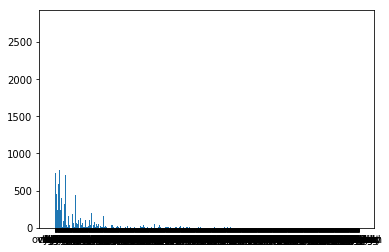

number of different words: 1502
well 179
there 341
s 1897
uh 808
a 733
little 266
girl 223
here 122
and 1397
that 456
looks 76
like 101
on 450
her 237
right 39
side 18
young 19
lady 42
she 583
washing 73
the 2787
cleaning 5
what 184
is 774
exc 268
all 135
bad 8
things 24
sink 239
overflowing 46
stool 317
going 90
over 308
cookie 400
jar 295
I 522
guess 68
saying 11
give 17
me 36
shh 11
mhm 36
alright 19
um 94
boy 290
getting 55
it 467
he 455
in 321
shape 1
because 36
thing 31
fallin 49
g 717
picture 28
mother 199
washin 48
dishes 308
doesn 32
t 284
see 184
so 58
water 354
might 16
get 116
falled 1
ed 1
if 33
you 157
don 122
fell 14
fall 106
of 167
kitchen 40
window 104
curtains 42
are 113
very 27
distinct 1
but 90
flow 1
still 22
flowing 10
touchin 4
cake 5
r 129
reachin 25
his 187
hand 90
up 211
woman 33
dryin 66
falling 65
cups 45
plate 45
wasits 1
flowin 3
hasn 5
fallen 2
yet 12
telling 12
him 82
to 445
do 56
hm 39
children 18
wash 11
okay 65
yeah 63
father 1
didn 27
come 9
gettin 4

listening 1
tasty 1
precarious 2
sloppin 1
shrubs 2
apples 1
both 3
baby 1
pineapple 1
partially 1
tellin 3
lopsided 1
couldn 1
mistake 1
bʌʃɪŋ 1
gushin 1
boys 3
choc 1
dɪʃɪn 1
hon 2
ey 2
sorry 1
chuckles 1
homely 1
grunt 1
tea 2
faucets 2
bənʌf 1
above 3
bove 1
road 1
drive 1
kol 1
kɪt 1
job 1
ask 2
read 1
teetering 1
wi 1
watching 3
beautiful 1
ofcourse 5
immersed 1
allowed 2
dear 1
someone 1
should 5
honey 2
oldest 1
ten 1
kick 1
ass 1
rollin 1
ink 1
direction 1
definitely 1
sounds 1
airplane 1
titled 1
hell 3
dumb 1
hmhunh 3
flue 1
beep 1
ohno 1
sinks 1
meant 2
sitting 3
wanted 2
pencil 1
doctor 1
sit 1
bout 2
slantin 1
kay 1
persons 1
instructing 1
collapse 1
windo 3
ro 1
plug 2
warm 1
sunny 2
talking 3
beside 2
behind 3
caught 2
halfway 1
clean 2
waving 5
painting 1
nd 1
sees 2
pro 2
po 1
possibly 1
whispering 2
tear 1
cutting 1
piece 2
ps 1
beggin 3
pointin 1
since 2
st 6
drawer 2
killed 1
gal 2
payin 2
drippin 2
workin 1
criticizing 1
neighborhood 1
neighbor 3
shoe 2
tie 2
show

In [54]:
plot_word_distribution(df_alz)